# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [109]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import regex as re
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\Untitled Folder\\temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [51]:
df.shape

(7752, 25)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Checking for null data

In [53]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Dropping rows having null data

In [54]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [57]:
df1=list(set(df.columns)-{'Next_Tmax','Next_Tmin'})
df_train=df[df1]

In [64]:
df_train['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month

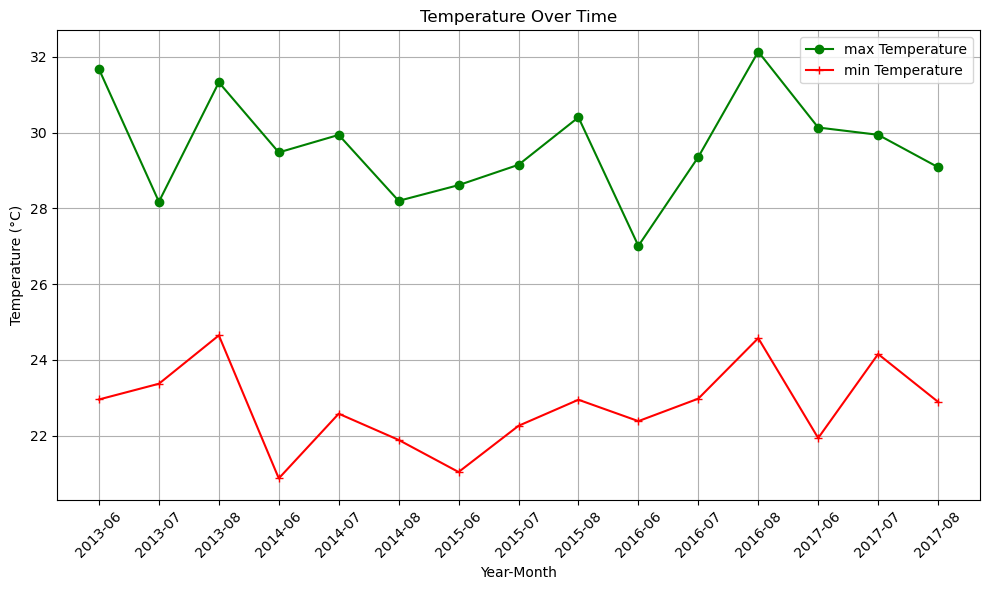

In [87]:
gb=df_train.groupby(['Year','Month'])[['Present_Tmax','Present_Tmin']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot([f"{y}-{m:02d}" for y, m in zip(gb['Year'], gb['Month'])], gb['Present_Tmax'], marker='o',color='green',label='max Temperature')
plt.plot([f"{y}-{m:02d}" for y, m in zip(gb['Year'], gb['Month'])], gb['Present_Tmin'], marker='+',color='red',label='min Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [97]:
df_train.groupby('station')['Present_Tmax'].mean().reset_index().sort_values(by='Present_Tmax',ascending=False).head()

,station,Present_Tmax
17,18.0,31.024104
22,23.0,30.526384
24,25.0,30.446906
21,22.0,30.326159
23,24.0,30.277815


In [100]:
df_train.groupby('station')['Present_Tmin'].mean().reset_index().sort_values(by='Present_Tmin',ascending=False).head()

,station,Present_Tmin
23,24.0,24.246689
22,23.0,24.152769
24,25.0,24.066124
5,6.0,24.018272
17,18.0,23.943974


stations 18,23,25,22 are the hottest stations with high present t max and tmin

In [101]:
df_train.groupby('station')['Solar radiation'].mean().reset_index().sort_values(by='Solar radiation',ascending=False).head()

,station,Solar radiation
0,1.0,5474.821205
19,20.0,5417.812317
11,12.0,5387.201730
18,19.0,5365.724642
5,6.0,5350.349168


In [104]:
df_train.groupby('station')['Slope'].mean().reset_index().sort_values(by='Slope',ascending=False).head()

,station,Slope
9,10.0,5.1782
19,20.0,4.7296
0,1.0,2.7850
12,13.0,2.6865
3,4.0,2.5348


In [106]:
df_train.groupby('station')['DEM'].mean().reset_index().sort_values(by='DEM',ascending=False).head()

,station,DEM
0,1.0,212.3350
9,10.0,208.5070
19,20.0,146.5540
11,12.0,132.1180
15,16.0,82.2912


# Testing for Next_Tmax

In [114]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df_train.drop(['Date'],axis=1)
y1=df['Next_Tmax']
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y1_train.shape,y1_test.shape

((5311, 24), (2277, 24), (5311,), (2277,))

In [130]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [110]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [131]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y1_train)
    
    # Predict the model with test data

    y1_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analy1sis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y1_test, y1_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y1_test, y1_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),3))
    print('R2_score:', round(metrics.r2_score(y1_test, y1_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y1_test, y1_pred):
        y1_test, y1_pred = np.array(y1_test), np.array(y1_pred)
        return np.mean(np.abs((y1_test - y1_pred) / y1_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y1_test, y1_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y1_test, y1_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y1)-1)/(len(y1)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y1_test, y1_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y1_test, y1_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))),
               'R2_score' : metrics.r2_score(y1_test, y1_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1.08
Mean Squared Error (MSE): 2.049
Root Mean Squared Error (RMSE): 1.432
R2_score: 0.786121
Root Mean Squared Log Error (RMSLE): 0.359
Mean Absolute Percentage Error (MAPE): 3.64 %
Adj R Square:  0.785442
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 2.202
Root Mean Squared Error (RMSE): 1.484
R2_score: 0.770233
Root Mean Squared Log Error (RMSLE): 0.395
Mean Absolute Percentage Error (MAPE): 3.49 %
Adj R Square:  0.769504
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.734
Mean Squared Error (MSE): 0.955
Root Mean Squared Error (RMSE): 0.977
R2_score: 0.900328
Root Mean Squared Log Error (RMSLE): -0.023
Mean Absolute Percentage Error (MAPE): 2.45 %
Adj R Square:  0.900012
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1.63
Mean Squared Error (MSE): 4.368
Root Mean Squared Error (RMSE): 2.09
R2_score: 0.544169
Root Mean Squared Log Error (RMSLE): 0.737
Mean Absolute Percentage Error (MAPE): 5.51 %
Adj R Square:  0.542722
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 0.623
Mean Squared Error (MSE): 0.675
Root Mean Squared Error (RMSE): 0.822
R2_score: 0.92955
Root Mean Squared Log Error (RMSLE): -0.196
Mean Absolute Percentage Error (MAPE): 2.08 %
Adj R Square:  0.929326
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 0.895
Mean Squared Error (MSE): 1.361
Root Mean Squared Error (RMSE): 1.167
R2_score: 0.857931
Root Mean Squared Log Error (RMSLE): 0.154
Mean Absolute Percentage Error (MAPE): 3.0 %
Adj R Square:  0.85748
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 0.662
Mean Squared Error (MSE): 0.757
Root Mean Squared Error (RMSE): 0.87
R2_score: 0.920989
Root Mean Squared Log Error (RMSLE): -0.139
Mean Absolute Percentage Error (MAPE): 2.22 %
Adj R Square:  0.920738
-----

C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 0.788
Mean Squared Error (MSE): 1.117
Root Mean Squared Error (RMSE): 1.057
R2_score: 0.883379
Root Mean Squared Log Error (RMSLE): 0.056
Mean Absolute Percentage Error (MAPE): 2.63 %
Adj R Square:  0.883009
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 1.08
Mean Squared Error (MSE): 2.049
Root Mean Squared Error (RMSE): 1.432
R2_score: 0.786135
Root Mean Squared Log Error (RMSLE): 0.359
Mean Absolute Percentage Error (MAPE): 3.64 %
Adj R Square:  0.785456
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 1.17
Mean Squared Error (MSE): 2.31
Root Mean Squared Error (RMSE): 1.52
R2_score: 0.758911
Root Mean Squared Log Error (RMSLE): 0.419
Mean Absolute Percentage Error (MAPE): 3.95 %
Adj R Square:  0.75814

C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\1555561667.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [148]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.929326,0.622872,0.821630,2.077917,0.675076,-0.196465,0.929550
1,XGBRegressor,0.920738,0.661887,0.870116,2.220418,0.757102,-0.139129,0.920989
2,RandomForestRegressor,0.900012,0.733508,0.977287,2.449991,0.955090,-0.022975,0.900328
3,BaggingRegressor,0.883009,0.787901,1.057117,2.633049,1.117497,0.055546,0.883379
4,GradientBoostingRegressor,0.857480,0.894672,1.166769,3.004956,1.361350,0.154238,0.857931
5,Ridge Regression,0.785456,1.080295,1.431545,3.635974,2.049320,0.358754,0.786135
6,LinearRegression,0.785442,1.080426,1.431590,3.636409,2.049450,0.358786,0.786121
7,DecisionTreeRegressor,0.769504,1.039921,1.483813,3.490406,2.201700,0.394615,0.770233
8,Lasso Regression,0.758146,1.169758,1.519931,3.952277,2.310190,0.418665,0.758911
9,KNeighborsRegressor,0.542722,1.630189,2.089953,5.512685,4.367905,0.737142,0.544169


Extra Trees Regressor is the best model with highest R2 score for next_Tmax . Let us test it with next_Tmin

# Testing for Next_Tmin

In [118]:
y2=df['Next_Tmin']
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y2_train.shape,y2_test.shape

((5311, 24), (2277, 24), (5311,), (2277,))

In [124]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results1=pd.DataFrame(a)
Results1.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [125]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y2_train)
    
    # Predict the model with test data

    y2_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analy2sis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y2_test, y2_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y2_test, y2_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)),3))
    print('R2_score:', round(metrics.r2_score(y2_test, y2_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y2_test, y2_pred):
        y2_test, y2_pred = np.array(y2_test), np.array(y2_pred)
        return np.mean(np.abs((y2_test - y2_pred) / y2_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y2_test, y2_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y2_test, y2_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y2)-1)/(len(y2)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y2_test, y2_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y2_test, y2_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))),
               'R2_score' : metrics.r2_score(y2_test, y2_pred)}
    Results1 = Results1.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.774
Mean Squared Error (MSE): 1.001
Root Mean Squared Error (RMSE): 1.0
R2_score: 0.834479
Root Mean Squared Log Error (RMSLE): 0.0
Mean Absolute Percentage Error (MAPE): 3.46 %
Adj R Square:  0.833954
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.851
Mean Squared Error (MSE): 1.314
Root Mean Squared Error (RMSE): 1.146
R2_score: 0.782555
Root Mean Squared Log Error (RMSLE): 0.137
Mean Absolute Percentage Error (MAPE): 3.83 %
Adj R Square:  0.781865
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.576
Mean Squared Error (MSE): 0.586
Root Mean Squared Error (RMSE): 0.765
R2_score: 0.903086
Root Mean Squared Log Error (RMSLE): -0.267
Mean Absolute Percentage Error (MAPE): 2.59 %
Adj R Square:  0.902778
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1.327
Mean Squared Error (MSE): 2.97
Root Mean Squared Error (RMSE): 1.723
R2_score: 0.508721
Root Mean Squared Log Error (RMSLE): 0.544
Mean Absolute Percentage Error (MAPE): 5.97 %
Adj R Square:  0.507162
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 0.537
Mean Squared Error (MSE): 0.515
Root Mean Squared Error (RMSE): 0.718
R2_score: 0.914752
Root Mean Squared Log Error (RMSLE): -0.331
Mean Absolute Percentage Error (MAPE): 2.41 %
Adj R Square:  0.914481
------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 0.644
Mean Squared Error (MSE): 0.692
Root Mean Squared Error (RMSE): 0.832
R2_score: 0.885442
Root Mean Squared Log Error (RMSLE): -0.184
Mean Absolute Percentage Error (MAPE): 2.88 %
Adj R Square:  0.885078
------------------------------------------------------------------------------------------------------------
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone

C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 0.602
Mean Squared Error (MSE): 0.64
Root Mean Squared Error (RMSE): 0.8
R2_score: 0.894146
Root Mean Squared Log Error (RMSLE): -0.223
Mean Absolute Percentage Error (MAPE): 2.7 %
Adj R Square:  0.89381
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 0.774
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
R2_score: 0.834512
Root Mean Squared Log Error (RMSLE): 0.0
Mean Absolute Percentage Error (MAPE): 3.46 %
Adj R Square:  0.833987
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 0.786
Mean Squared Error (MSE): 1.036
Root Mean Squared Error (RMSE): 1.018
R2_score: 0.828655
Root Mean Squared Log Error (RMSLE): 0.018
Mean Absolute Percentage Error (MAPE): 3.51 %
Adj R Square:  0.828111
----

C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16612\651428763.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results1 = Results1.append(new_row, ignore_index=True)


In [147]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result1=pd.DataFrame({'Model_Name':models})
result1['Adj_R_Square']=Results1['Adj_R_Square']
result1['Mean_Absolute_Error_MAE']=Results1['Mean_Absolute_Error_MAE']
result1['Root_Mean_Squared_Error_RMSE']=Results1['Root_Mean_Squared_Error_RMSE']
result1['Mean_Absolute_Percentage_Error_MAPE']=Results1['Mean_Absolute_Percentage_Error_MAPE']
result1['Mean_Squared_Error_MSE']=Results1['Mean_Squared_Error_MSE']
result1['Root_Mean_Squared_Log_Error_RMSLE']=Results1['Root_Mean_Squared_Log_Error_RMSLE']
result1['R2_score']=Results['R2_score']
result1=result1.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result1

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,XGBRegressor,0.936536,0.469743,0.618394,2.113395,0.382411,-0.480630,0.920989
1,ExtraTreesRegressor,0.914481,0.536893,0.717849,2.414623,0.515307,-0.331496,0.929550
2,RandomForestRegressor,0.902778,0.576282,0.765392,2.585729,0.585824,-0.267368,0.900328
3,BaggingRegressor,0.893810,0.602025,0.799917,2.701642,0.639867,-0.223248,0.883379
4,GradientBoostingRegressor,0.885078,0.643816,0.832155,2.877524,0.692481,-0.183737,0.857931
5,Ridge Regression,0.833987,0.773959,1.000171,3.463110,1.000342,0.000171,0.786135
6,LinearRegression,0.833954,0.774085,1.000273,3.463724,1.000546,0.000273,0.786121
7,Lasso Regression,0.828111,0.786132,1.017717,3.513842,1.035749,0.017562,0.758911
8,DecisionTreeRegressor,0.781865,0.851120,1.146479,3.825566,1.314414,0.136695,0.770233
9,KNeighborsRegressor,0.507162,1.327484,1.723279,5.971396,2.969690,0.544229,0.544169


In [149]:
result1.set_index('Model_Name',inplace=True)
result.set_index('Model_Name',inplace=True)

In [150]:
result_avg=(result+result1)/2

In [151]:
result_avg=result_avg.sort_values(by='Adj_R_Square',ascending=False)

In [152]:
result_avg

,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
Model_Name,,,,,,,
XGBRegressor,0.928637,0.565815,0.744255,2.166906,0.569757,-0.309879,0.920989
ExtraTreesRegressor,0.921903,0.579883,0.769740,2.246270,0.595192,-0.263980,0.929550
RandomForestRegressor,0.901395,0.654895,0.871339,2.517860,0.770457,-0.145171,0.900328
BaggingRegressor,0.888410,0.694963,0.928517,2.667345,0.878682,-0.083851,0.883379
GradientBoostingRegressor,0.871279,0.769244,0.999462,2.941240,1.026916,-0.014749,0.857931
Ridge Regression,0.809721,0.927127,1.215858,3.549542,1.524831,0.179463,0.786135
LinearRegression,0.809698,0.927255,1.215931,3.550067,1.524998,0.179529,0.786121
Lasso Regression,0.793129,0.977945,1.268824,3.733060,1.672969,0.218114,0.758911
DecisionTreeRegressor,0.775684,0.945520,1.315146,3.657986,1.758057,0.265655,0.770233


# The best ML model is XGBRegressor which has the highest avg R2 value for training Next_Tmax and next_Tmin